## **Esteganografía de imágenes**

[1]https://www.thepythoncode.com/article/hide-secret-data-in-images-using-steganography-python

[2]https://towardsdatascience.com/hiding-data-in-an-image-image-steganography-using-python-e491b68b1372

In [ ]:
#importación de todas las bibliotecas necesarias

import cv2
import numpy as np
import types
from google.colab.patches import cv2_imshow #Google colab se bloquea si se intenta mostrar 
# la imagen usando cv2.imshow() por lo tanto se usa esta importación

In [ ]:
def messageToBinary(message):
  if type(message) == str:
    return ''.join([ format(ord(i), "08b") for i in message ])
  elif type(message) == bytes or type(message) == np.ndarray:
    return [ format(i, "08b") for i in message ]
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  else:
    raise TypeError("Input type no soportado")

In [ ]:
# Función para ocultar el mensaje secreto en la imagen

def hideData(image, secret_message):

  # calcular los máximos bytes para codificar
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Maximum bytes to encode:", n_bytes)

  #Comprueba si el número de bytes a codificar es menor que el máximo de bytes de la imagen
  if len(secret_message) > n_bytes:
      raise ValueError("¡Error encontrado bytes insuficientes, necesidad de una imagen más grande o menos datos!")
  
  secret_message += "#####" # delimitador

  data_index = 0
  # convertir los datos de entrada en formato binario usando la función messageToBinary()
  binary_secret_msg = messageToBinary(secret_message)

  data_len = len(binary_secret_msg) #Encontrar la longitud de los datos que hay que ocultar
  for values in image:
      for pixel in values:
          # convertir los valores RGB al formato binario
          r, g, b = messageToBinary(pixel)
          # modificar el bit menos significativo sólo si todavía hay datos que almacenar
          if data_index < data_len:
              # ocultar los datos en el trozo menos significativo de píxel rojo
              pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # ocultar los datos en el trozo menos significativo de píxel verde
              pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # ocultar los datos en el trozo menos significativo de píxel azul
              pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          # si los datos están codificados, sólo hay que salir del bucle
          if data_index >= data_len:
              break

  return image

In [ ]:
def showData(image):

  binary_data = ""
  for values in image:
      for pixel in values:
          r, g, b = messageToBinary(pixel) #convertir los valores de rojo, verde y azul en formato binario
          binary_data += r[-1] #extrayendo datos del trozo menos significativo del píxel rojo
          binary_data += g[-1] #extrayendo datos del trozo menos significativo del píxel verde
          binary_data += b[-1] #extrayendo datos del trozo menos significativo del píxel azul
  # split por 8-bits
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
  # convert from bits to characters
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-5:] == "#####": #comprueba si se a llegado al delimitador que es "#####"
          break
  #print(decoded_data)
  return decoded_data[:-5] #quitar el delimitador para mostrar el mensaje original oculto

In [ ]:
# Codificar los datos en la imagen 
def encode_text(): 
  image_name = input("Introduzca el nombre de la imagen (con la extensión)-Ej: Hola.jpg : ") 
  image = cv2.imread(image_name) # Leer la imagen de entrada usando OpenCV-Python
  #Es una biblioteca de enlaces de Python diseñada para resolver problemas de visualización por ordenador
  
  #detalles de la imagen
  print("La forma de la imagen es: ",image.shape) #comprobar la forma de la imagen para calcular el número de bytes en ella
  print("La imagen original es la que se muestra a continuación: ")
  resized_image = cv2.resize(image, (500, 500)) # el tamaño de la imagen se puede cambiar según las necesidades
  cv2_imshow(resized_image) #mostrar la imagen
  
      
  data = input("Introducir los datos a codificar : ") 
  if (len(data) == 0): 
    raise ValueError('Los datos están vacíos')
  
  filename = input("Introduzca el nombre de la nueva imagen codificada (con la extensión)-Ej: Hola.jpg : ")
  encoded_image = hideData(image, data) # llamar a la función "hideData" para ocultar el mensaje secreto en la imagen seleccionada
  cv2.imwrite(filename, encoded_image)

 
    

In [ ]:
# Decodificar los datos de la imagen 
def decode_text():
  # leer la imagen que contiene la imagen oculta
  image_name = input("Introduzca el nombre de la imagen esteganografiada que desea decodificar (con extensión)-Ej: Hola.jpg :") 
  image = cv2.imread(image_name) #leer la imagen usando cv2.imread() 

  print("La imagen esteganografiada es la que se muestra a continuación: ")
  resized_image = cv2.resize(image, (500, 500))  #el tamaño de la imagen se puede cambiar según las necesidades
  cv2_imshow(resized_image) #mostrar la imagen Steganografiada
    
  text = showData(image)
  return text

In [ ]:
# Esteganografía de imágenes         
def Steganography(): 
    a = input("Esteganografía de imágenes  \n 1. Encode \n 2. Decode \n Su entrada es: ")
    userinput = int(a)
    if (userinput == 1):
      print("\nCodificando....")
      encode_text() 
          
    elif (userinput == 2):
      print("\nDecodificando....") 
      print("El mensaje decodificado es " + decode_text()) 
    else: 
        raise Exception("Introduzca la entrada correcta") 
          


Esteganografía de imágenes  
 1. Encode 
 2. Decode 
 Su entrada es: 1

Codificando....
Introduzca el nombre de la imagen (con la extensión)-Ej: Hola.jpg : test.png
La forma de la imagen es:  (500, 500, 3)
La imagen original es la que se muestra a continuación: 


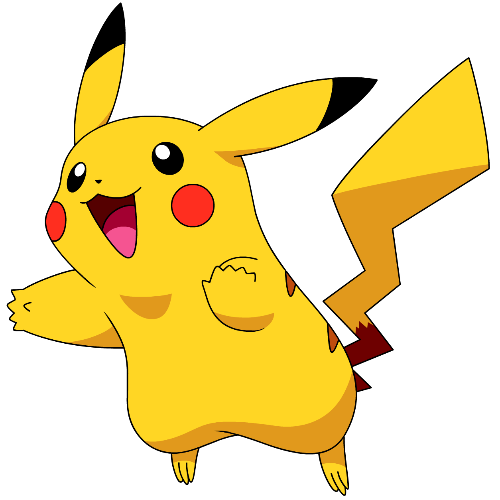

Introducir los datos a codificar : Hola mundo
Introduzca el nombre de la nueva imagen codificada (con la extensión)-Ej: Hola.jpg : result.png
Maximum bytes to encode: 93750


In [ ]:
Steganography() #codificar imagen

Esteganografía de imágenes  
 1. Encode 
 2. Decode 
 Su entrada es: 2

Decodificando....
Introduzca el nombre de la imagen esteganografiada que desea decodificar (con extensión)-Ej: Hola.jpg :result.png
The Steganographed image is as shown below: 


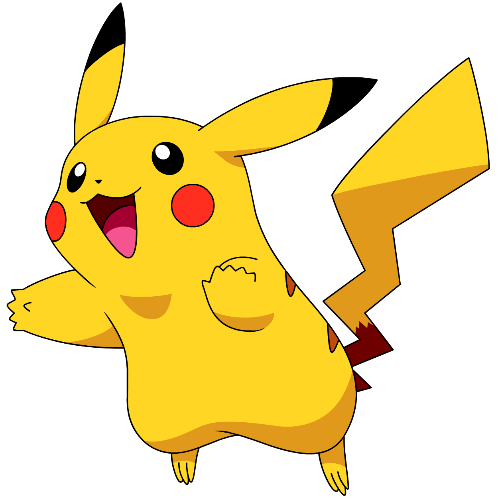

El mensaje decodificado es Hola mundo


In [ ]:
Steganography() #decodificar de la imagen